In [43]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

import sys
sys.path.append('..')
import helper.svm

import numpy as np
import pandas as pd
import sklearn.svm
import seaborn as sns

In [44]:
data = helper.svm.load_data('./data/ex6data1.mat')
data.head()

dict_keys(['y', '__version__', '__header__', 'X', '__globals__'])


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


# visualize data
pay attention to the edge case at the left hand side

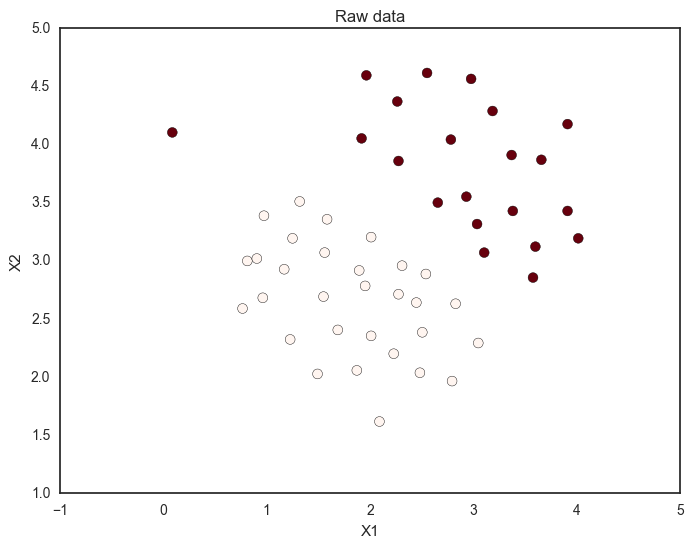

In [74]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['y'], cmap='Reds')
ax.set_title('Raw data')
ax.set_xlabel('X1')
ax.set_ylabel('X2')

# try $C=1$
http://scikit-learn.org/stable/modules/generated/sklearn.svm.LinearSVC.html#sklearn.svm.LinearSVC

In [46]:
svc1 = sklearn.svm.LinearSVC(C=1, loss='hinge')
svc1.fit(data[['X1', 'X2']], data['y'])
svc1.score(data[['X1', 'X2']], data['y'])

0.98039215686274506

In [47]:
data['SVM1 Confidence'] = svc1.decision_function(data[['X1', 'X2']])

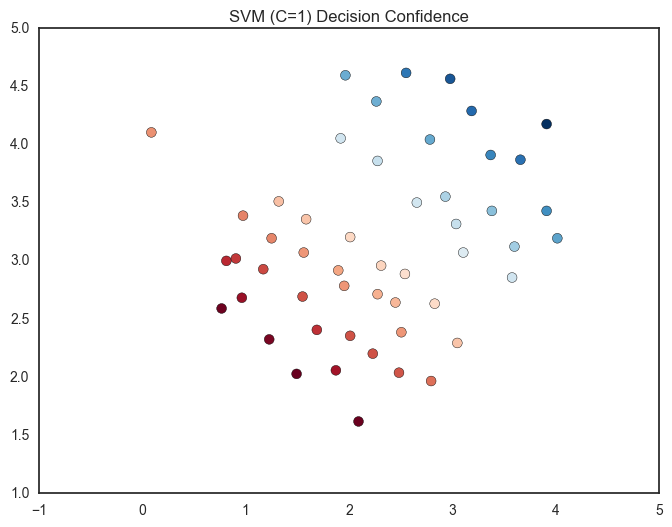

In [78]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM1 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=1) Decision Confidence')

# try $C=100$
with large C, you try to overfit the data, so the left hand side edge case now is categorized right

In [49]:
svc100 = sklearn.svm.LinearSVC(C=100, loss='hinge')
svc100.fit(data[['X1', 'X2']], data['y'])
svc100.score(data[['X1', 'X2']], data['y'])

1.0

In [50]:
data['SVM100 Confidence'] = svc100.decision_function(data[['X1', 'X2']])

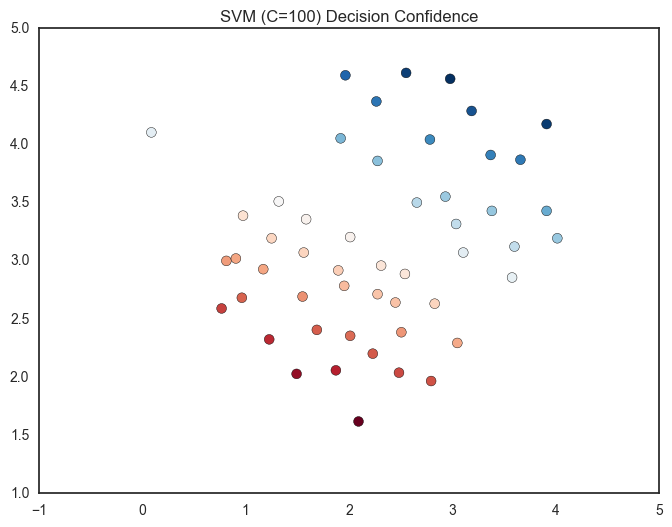

In [79]:
fig, ax = plt.subplots(figsize=(8,6))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM100 Confidence'], cmap='RdBu')
ax.set_title('SVM (C=100) Decision Confidence')

In [52]:
data

,X1,X2,y,SVM1 Confidence,SVM100 Confidence
0,1.964300,4.5957,1,0.798918,3.799077
1,2.275300,3.8589,1,0.381133,1.857704
2,2.978100,4.5651,1,1.373407,4.794654
3,2.932000,3.5519,1,0.518749,1.615583
4,3.577200,2.8560,1,0.331981,0.159890
5,4.015000,3.1937,1,0.866632,1.673700
6,3.381400,3.4291,1,0.684206,1.719506
7,3.911300,4.1761,1,1.607559,4.596565
8,2.782200,4.0431,1,0.831293,2.971695
9,2.551800,4.6162,1,1.163058,4.494108
